# Mitigating Noise on Quantum Computers 
> We will be going to explore about the quantum noices and how it affects the quantum computation on the quantum device.
1. Qiskit-tera : to write quantum compter programs
2. Qiskit-aer : to simulate the quantum progams(circuits) that includes noisey models
3. Qiskit-ignis : tools for quantum hardware varification, noise characterization and error correction.
4. 

In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/yuDxHJOKsVA", width=1920/2, height=1080/2)

In [3]:
from qiskit import *

In [10]:
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

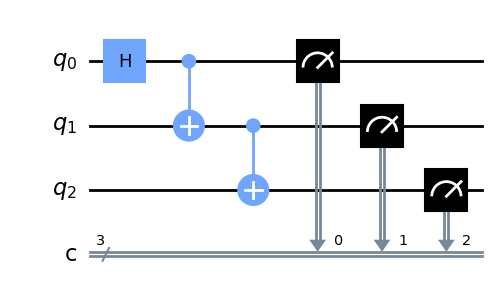

In [9]:
# let's create a circuit
n_qubits = 3
n_bits = 3
qc = QuantumCircuit(n_qubits, n_bits)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

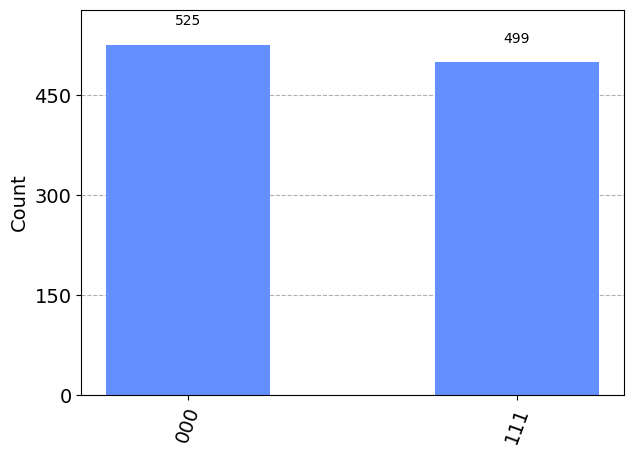

In [12]:
# let's try to find what we have measured by simulating our circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(qc))

In [ ]:
## let's run this circuit on the real ibm quantum computer 
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp, shots=1024)
job_monitor(job)


In [ ]:
job_result = qcomp.result()
plot_histogram(qcomp.get_counts(qc))

In [ ]:
# lets calibrate the measurement error